In [ ]:
X_train = ["This was really awesome an awesome movie",
           "Great movie! Ilikes it a lot",
           "Happy Ending! Awesome Acting by hero",
           "loved it!",
           "Bad not upto the mark",
           "Could have been better",
           "really Dissapointed by the movie"]
# X_test = "it was really awesome and really disspntd"

y_train =["1","1","1","0","0","0","0"] # 1- Positive class, 0- negative class


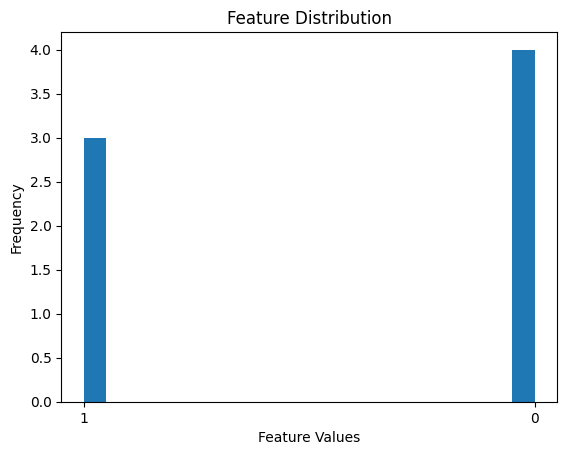

In [ ]:

plt.hist(y_train, bins=20)
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Feature Distribution')
plt.show()

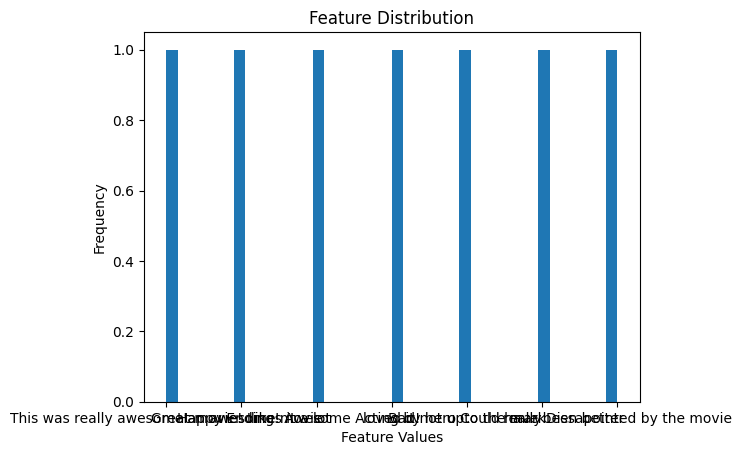

In [ ]:
plt.hist(X_train, bins=40)
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Feature Distribution')
plt.show()

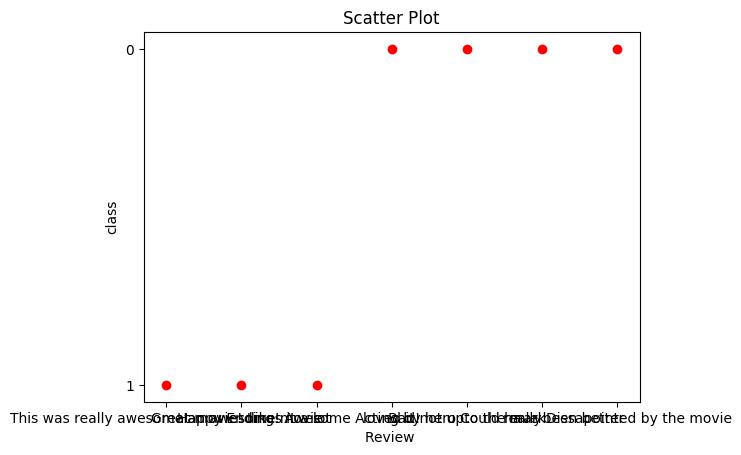

In [ ]:
plt.scatter(X_train, y_train,c='red')
plt.xlabel('Review ')
plt.ylabel('class')
plt.title('Scatter Plot')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.linear_model import LinearRegression

In [ ]:
X_train

['This was really awesome an awesome movie',
 'Great movie! Ilikes it a lot',
 'Happy Ending! Awesome Acting by hero',
 'loved it!',
 'Bad not upto the mark',
 'Could have been better',
 'really Dissapointed by the movie']

In [ ]:
from nltk.tokenize import RegexpTokenizer
import seaborn as sns

In [ ]:
from nltk.stem.porter import PorterStemmer
# NLTK -> Stem -> Porter -> PorterStemmer

from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [ ]:
def getCleanedText(text):
  text = text.lower()

  # tokenizing
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  stemmed_tokens = [ps.stem(tokens) for tokens in new_tokens]
  clean_text = " ".join(stemmed_tokens)
  return clean_text

In [ ]:
X_test = ["it was bad"]

In [ ]:
X_clean = [getCleanedText(i) for i in X_train]
xt_clean = [getCleanedText(i) for i in X_test]

In [ ]:
X_clean

['realli awesom awesom movi',
 'great movi ilik lot',
 'happi end awesom act hero',
 'love',
 'bad upto mark',
 'could better',
 'realli dissapoint movi']

In [ ]:
X_train = ["This was awesome an awesome movie",
           "Great movie! Ilikes it a lot",
           "Happy Ending! Awesome Acting by hero",
           "loved it!",
           "Bad not upto the mark",
           "Could have been better",
           "Dissapointed by the movie"]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = CountVectorizer(ngram_range = (1,2))

In [ ]:
X_vec = cv.fit_transform(X_clean).toarray()

In [ ]:
feature_names = cv.get_feature_names_out()

In [ ]:
X_vec

array([[0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])

In [ ]:
print(cv.get_feature_names_out())

['act' 'act hero' 'awesom' 'awesom act' 'awesom awesom' 'awesom movi'
 'bad' 'bad upto' 'better' 'could' 'could better' 'dissapoint'
 'dissapoint movi' 'end' 'end awesom' 'great' 'great movi' 'happi'
 'happi end' 'hero' 'ilik' 'ilik lot' 'lot' 'love' 'mark' 'movi'
 'movi ilik' 'realli' 'realli awesom' 'realli dissapoint' 'upto'
 'upto mark']


In [ ]:
Xt_vect = cv.transform(xt_clean).toarray()

In [ ]:
Xt_vect

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mn = MultinomialNB()

In [ ]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = mn.predict(Xt_vect)

In [ ]:
y_pred

array(['negative'], dtype='<U8')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = LogisticRegression()

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 100.00
